In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [54]:
df_heights_weights = pd.read_csv("../dados/heights-weights-dataset/heights_weights_dataset.csv", sep=";")

df_heights_weights["Height(m)"] = df_heights_weights["Height(Inches)"] * 0.0254
df_heights_weights["Weight(Kg)"] = df_heights_weights["Weight(Pounds)"] * 0.453592
df_heights_weights["IMC"] = df_heights_weights["Weight(Kg)"] / (df_heights_weights["Height(m)"] ** 2)

df_heights_weights

,Height(Inches),Weight(Pounds),State,Height(m),Weight(Kg),IMC
0,65.78331,112.9925,Louisiana,1.670896,51.252494,18.357609
1,71.51521,136.4873,Illinois,1.816486,61.909547,18.762615
2,69.39874,153.0269,Pennsylvania,1.762728,69.411778,22.338940
3,68.21660,142.3354,Arizona,1.732702,64.562199,21.504569
4,67.78781,144.2971,Georgia,1.721810,65.452010,22.077625
...,...,...,...,...,...,...
24995,69.50215,118.0312,Maryland,1.765355,53.538008,17.179016
24996,64.54826,120.1932,Indiana,1.639526,54.518674,20.281906
24997,64.69855,118.2655,Nebraska,1.643343,53.644285,19.864010
24998,67.52918,132.2682,Ohio,1.715241,59.995797,20.392499


In [55]:
scaler = MinMaxScaler()
df_heights_weights["IMC_Encoded"] = scaler.fit_transform(df_heights_weights["IMC"].to_numpy().reshape(-1, 1))

lbl_encoder = LabelEncoder()
df_heights_weights["State_encoded"] = lbl_encoder.fit_transform(df_heights_weights["State"])
df_heights_weights


,Height(Inches),Weight(Pounds),State,Height(m),Weight(Kg),IMC,IMC_Encoded,State_encoded
0,65.78331,112.9925,Louisiana,1.670896,51.252494,18.357609,0.408154,17
1,71.51521,136.4873,Illinois,1.816486,61.909547,18.762615,0.439422,12
2,69.39874,153.0269,Pennsylvania,1.762728,69.411778,22.338940,0.715525,37
3,68.21660,142.3354,Arizona,1.732702,64.562199,21.504569,0.651109,2
4,67.78781,144.2971,Georgia,1.721810,65.452010,22.077625,0.695351,9
...,...,...,...,...,...,...,...,...
24995,69.50215,118.0312,Maryland,1.765355,53.538008,17.179016,0.317163,19
24996,64.54826,120.1932,Indiana,1.639526,54.518674,20.281906,0.556716,13
24997,64.69855,118.2655,Nebraska,1.643343,53.644285,19.864010,0.524453,26
24998,67.52918,132.2682,Ohio,1.715241,59.995797,20.392499,0.565254,34


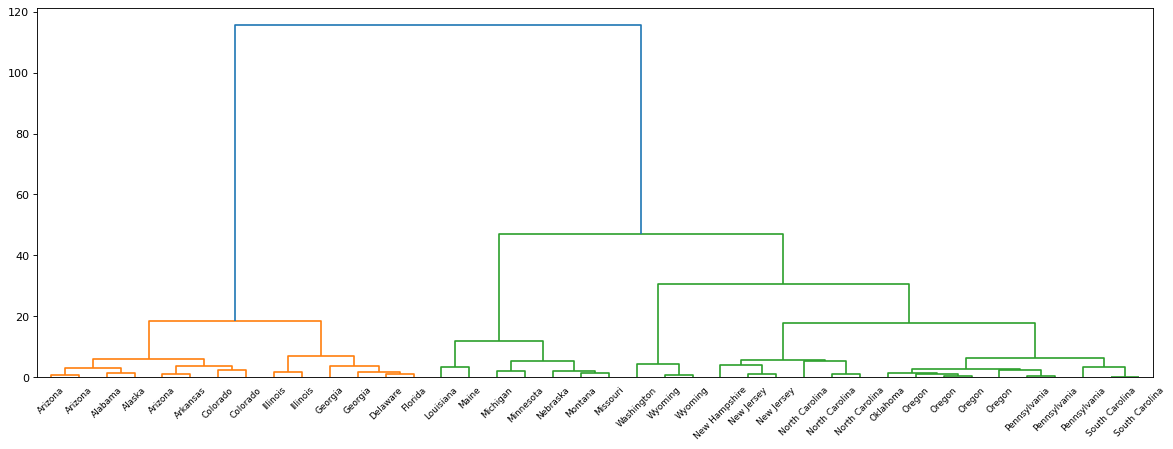

In [56]:
TAM = 40

df = df_heights_weights[["IMC", "State_encoded"]]

figure(figsize=(18, 6), dpi=80)
linkage_data = linkage(df[:TAM], method='ward', metric='euclidean')
dendrogram(linkage_data, labels=df_heights_weights["State"][:TAM].values)
plt.show()